In [151]:
!pip install pandas 
!pip install numpy
!pip install seaborn
!pip install matplotlib

In [152]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [153]:
pip install --upgrade certifi

Note: you may need to restart the kernel to use updated packages.


In [154]:
import ssl
import urllib.request

ssl._create_default_https_context = ssl._create_unverified_context


## Titanic Dataset
- Loading the Titanic Dataset into the notebook.

In [155]:
df = sns.load_dataset('titanic')
df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


### A Histogram Plot to show the spread of Fare prices.
- This Histogram Plot shows how fare prices were spread across the entrie boat.
- We had one fare which looks like an outlier since it is nearly double the next closest fare.

Text(0, 0.5, 'Frequency')

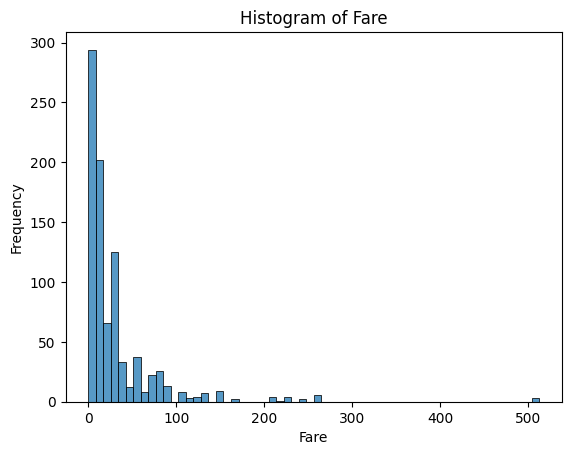

In [156]:
sns.histplot(data=df, x='fare', bins=60)
plt.title('Histogram of Fare')
plt.xlabel('Fare')
plt.ylabel('Frequency')

### The Max Fare Price 
- (outlier or someone got ripped off?)

In [159]:
max_fare = df['Fare'].max()
max_fare

512.3292

### A Histogram Plot to show the spread of Ages.
- This Histogram Plot shows the spread of ages across the Titanic.
- Each bin represents 2 years. e.g the 1st bin would be the ages 0-2, the 2nd bin 2-4 and so on.
- The Titanic had 20-22 year olds as the most frequent age group. Followed by 28-30 year olds and the 3rd most frequent ages were 22-24 year olds.
- The oldest passenger was between the ages of 78-80

Text(0, 0.5, 'Frequency')

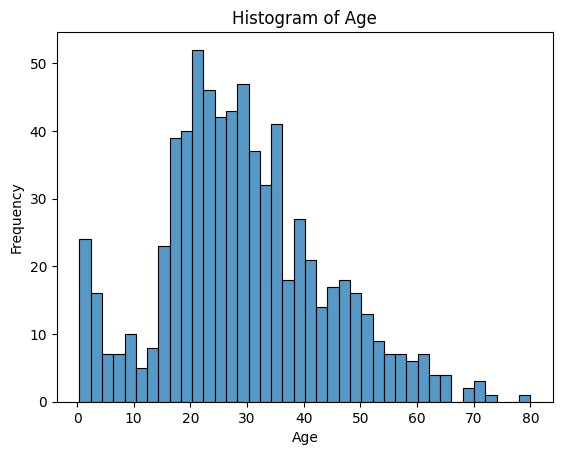

In [160]:
sns.histplot(data=df, x='Age', bins=40)
plt.title('Histogram of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')

### Missing Values in the Titanic dataset 
- Seeing where the Missing Values can be found and where they are in the Dataset.

In [161]:
missing_values = df.isnull().sum()
print("Missing Values:\n", missing_values)

Missing Values:
 Survived                      0
pclass                        0
Gender                        0
Age                         177
Siblings/Spouses Onboard      0
Parents/Children Onboard      0
Fare                          0
embarked                      2
Class                         0
who                           0
adult_male                    0
deck                        688
Embark Town                   2
alive                         0
alone                         0
dtype: int64


### Dropping Columns
- Dropping columns like **'deck'** which had the most missing values in the Dataset.
- Dropping Columns which are either repeated or the same as other columns. e.g **'embarked'**, **'who'**, etc.

In [162]:
columns_to_drop = ['deck', 'who', 'adult_male', 'embarked', 'pclass', 'alive', 'alone']
df.drop(columns_to_drop, axis=1, inplace=True)

### Removing Null Rows 
- Removing rows which contained Null values.

In [165]:
df.dropna(subset=['Fare', 'Age'], inplace=True)
missing_values = df.isnull().sum()
print("Missing Values:\n", missing_values)

Missing Values:
 Survived                    0
Gender                      0
Age                         0
Siblings/Spouses Onboard    0
Parents/Children Onboard    0
Fare                        0
Class                       0
Embark Town                 2
dtype: int64


### Duplicated Values
- Finding the rows which are duplicated in the Dataset.

In [166]:
duplicate_rows = df[df.duplicated()]
duplicate_rows

,Survived,Gender,Age,Siblings/Spouses Onboard,Parents/Children Onboard,Fare,Class,Embark Town
133,1,female,29.00,1,0,26.0000,Second,Southampton
173,0,male,21.00,0,0,7.9250,Third,Southampton
213,0,male,30.00,0,0,13.0000,Second,Southampton
313,0,male,28.00,0,0,7.8958,Third,Southampton
320,0,male,22.00,0,0,7.2500,Third,Southampton
343,0,male,25.00,0,0,13.0000,Second,Southampton
355,0,male,28.00,0,0,9.5000,Third,Southampton
387,1,female,36.00,0,0,13.0000,Second,Southampton
418,0,male,30.00,0,0,13.0000,Second,Southampton
476,0,male,34.00,1,0,21.0000,Second,Southampton


### Dropping Duplicate Values
- Removing the rows which are duplicated in the Dataset.

In [167]:
df.drop_duplicates(inplace=True)
df

,Survived,Gender,Age,Siblings/Spouses Onboard,Parents/Children Onboard,Fare,Class,Embark Town
0,0,male,22.0,1,0,7.2500,Third,Southampton
1,1,female,38.0,1,0,71.2833,First,Cherbourg
2,1,female,26.0,0,0,7.9250,Third,Southampton
3,1,female,35.0,1,0,53.1000,First,Southampton
4,0,male,35.0,0,0,8.0500,Third,Southampton
...,...,...,...,...,...,...,...,...
883,0,male,28.0,0,0,10.5000,Second,Southampton
885,0,female,39.0,0,5,29.1250,Third,Queenstown
887,1,female,19.0,0,0,30.0000,First,Southampton
889,1,male,26.0,0,0,30.0000,First,Cherbourg


### Renaming Columns
- Renaming columns so they are formatted the same.

In [168]:
df.rename(columns={'survived': 'Survived', 'sex': 'Gender', 'age': 'Age', 'sibsp': 'Siblings/Spouses Onboard', 'parch': 'Parents/Children Onboard', 'fare': 'Fare', 'class': 'Class', 'embark_town': 'Embark Town'}, inplace=True)
df

,Survived,Gender,Age,Siblings/Spouses Onboard,Parents/Children Onboard,Fare,Class,Embark Town
0,0,male,22.0,1,0,7.2500,Third,Southampton
1,1,female,38.0,1,0,71.2833,First,Cherbourg
2,1,female,26.0,0,0,7.9250,Third,Southampton
3,1,female,35.0,1,0,53.1000,First,Southampton
4,0,male,35.0,0,0,8.0500,Third,Southampton
...,...,...,...,...,...,...,...,...
883,0,male,28.0,0,0,10.5000,Second,Southampton
885,0,female,39.0,0,5,29.1250,Third,Queenstown
887,1,female,19.0,0,0,30.0000,First,Southampton
889,1,male,26.0,0,0,30.0000,First,Cherbourg


### Formatting Fare
- Formatting the Fare column so that the Fares are shown as 2 decimal places.

In [169]:
df['Fare'] = df['Fare'].round(2)
df

,Survived,Gender,Age,Siblings/Spouses Onboard,Parents/Children Onboard,Fare,Class,Embark Town
0,0,male,22.0,1,0,7.25,Third,Southampton
1,1,female,38.0,1,0,71.28,First,Cherbourg
2,1,female,26.0,0,0,7.92,Third,Southampton
3,1,female,35.0,1,0,53.10,First,Southampton
4,0,male,35.0,0,0,8.05,Third,Southampton
...,...,...,...,...,...,...,...,...
883,0,male,28.0,0,0,10.50,Second,Southampton
885,0,female,39.0,0,5,29.12,Third,Queenstown
887,1,female,19.0,0,0,30.00,First,Southampton
889,1,male,26.0,0,0,30.00,First,Cherbourg


### Descriptive Stats
- Descriptive Stats of the Dataset shown and rounded to 2 decimal places.

In [170]:
stats = df.describe()
stats_rounded = stats.round(2)
stats_rounded

,Survived,Age,Siblings/Spouses Onboard,Parents/Children Onboard,Fare
count,676.00,676.00,676.00,676.00,676.00
mean,0.42,29.81,0.54,0.45,35.85
std,0.49,14.73,0.95,0.87,54.07
min,0.00,0.42,0.00,0.00,0.00
25%,0.00,20.00,0.00,0.00,8.05
50%,0.00,28.00,0.00,0.00,16.10
75%,1.00,39.00,1.00,1.00,35.50
max,1.00,80.00,5.00,6.00,512.33


### Average Fare and Age per Class
- The average Fare and Age per class shown, with results rounded to 2 decimal places.

In [171]:
average_stats = df.groupby('Class', observed=False)[['Fare', 'Age']].mean()
average_stats = average_stats.round(2)
average_stats

,Fare,Age
Class,,
First,88.40,38.18
Second,22.17,29.86
Third,13.38,25.18


### A Bar Plot to show Average Fare by Class
- This Bar Plot shows us the average price paid by Class.
- We can see That First had the Highest Fare price by a considerable amount however, this may have been skewed by the fact that one fare price was above 500.
- Second and Third Class were considerably closer in terms of Fare Price with a difference of just under 9.

Text(0, 0.5, 'Average Fare')

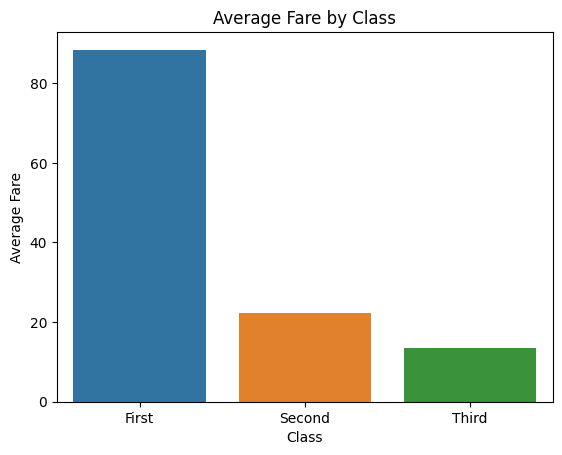

In [172]:
sns.barplot(data=average_stats, x='Class', y='Fare', hue='Class')
plt.title('Average Fare by Class')
plt.xlabel('Class')
plt.ylabel('Average Fare')

### A Bar Plot to show the average Age of passengers by Class
- This Bar Plot shows us the average age of passengers by Class.
- We can see the average age of passenger decrease as we go down the Classes.

Text(0, 0.5, 'Average Age')

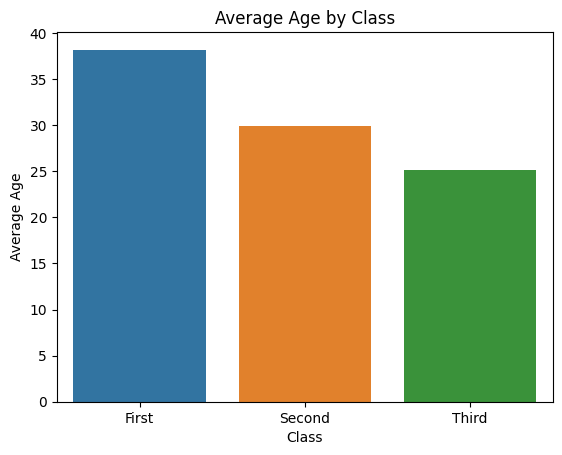

In [179]:
sns.barplot(data=average_stats, x='Class', y='Age', hue='Class')
plt.title('Average Age by Class')
plt.xlabel('Class')
plt.ylabel('Average Age')

### New Column added to the DataFrame
- 'Fare Percentage' column added to the Dataset, with the results rounded to 2 decimal places.

In [173]:
df['Fare Percentage'] = (df['Fare'] / df['Fare'].sum()) * 100
df['Fare Percentage'] = df['Fare Percentage'].round(2)
df

,Survived,Gender,Age,Siblings/Spouses Onboard,Parents/Children Onboard,Fare,Class,Embark Town,Fare Percentage
0,0,male,22.0,1,0,7.25,Third,Southampton,0.03
1,1,female,38.0,1,0,71.28,First,Cherbourg,0.29
2,1,female,26.0,0,0,7.92,Third,Southampton,0.03
3,1,female,35.0,1,0,53.10,First,Southampton,0.22
4,0,male,35.0,0,0,8.05,Third,Southampton,0.03
...,...,...,...,...,...,...,...,...,...
883,0,male,28.0,0,0,10.50,Second,Southampton,0.04
885,0,female,39.0,0,5,29.12,Third,Queenstown,0.12
887,1,female,19.0,0,0,30.00,First,Southampton,0.12
889,1,male,26.0,0,0,30.00,First,Cherbourg,0.12


### Survivors by Gender
- The number of survivors by Gender

In [174]:
survivors_gender = df.groupby('Gender')['Survived'].sum()
survivors_gender

Gender
female    191
male       92
Name: Survived, dtype: int64

### A Bar Graph to show the Number of Survivors by Gender
- This Bar Graph shows us the number of Survivors by Gender.
- We can see that Females, had almost double the amount of Survivors compared to Males.

Text(0.5, 0, 'Gender')

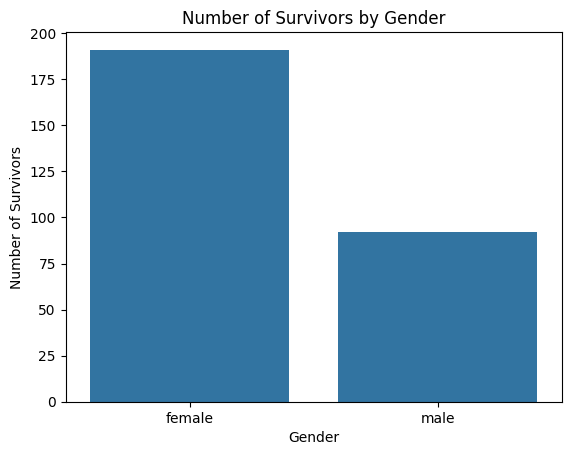

In [175]:
survived_df = df[df['Survived'] == 1]
sns.countplot(x='Gender', data=survived_df)
plt.title('Number of Survivors by Gender')
plt.ylabel('Number of Survivors')
plt.xlabel('Gender')

### Survivors by Class
- The percentage rate of survival dependent on Class, rounded to 2 decimal places.

In [176]:
survival_by_class = df.groupby('Class', observed=False)['Survived'].mean()
survival_by_class = (survival_by_class * 100).round(2)
survival_by_class

Class
First     65.76
Second    50.00
Third     24.85
Name: Survived, dtype: float64

### A Line Plot to show the Rate of Survival per Classes
- This Line Plot shows us the Rate of Survival, dependant on the Class you were in.
- From this Line Plot we can see that Survival Rate significally decreases as you move down the Classes.
- Those in First Class had over double the chance of survivng the disaster.

Text(0.5, 0, 'Classes')

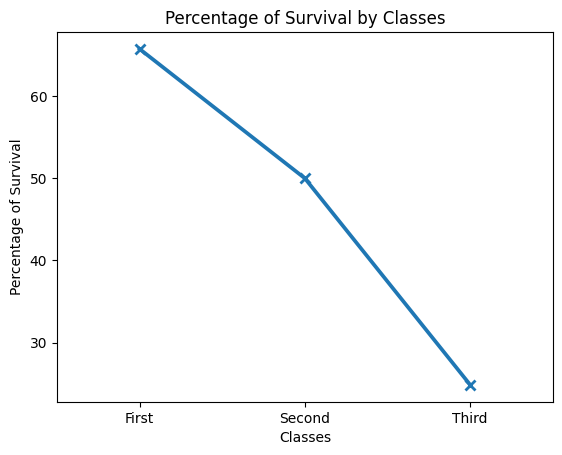

In [177]:
classes = ['First', 'Second', 'Third']
survival_percentages = [65.76, 50.00, 24.85]

sns.pointplot(x=classes, y=survival_percentages, markers='x')
plt.title('Percentage of Survival by Classes')
plt.ylabel('Percentage of Survival')
plt.xlabel('Classes')

### A Catplot to show how many Males and Females survived by Class.
- From the Catplot we can see that both First and Second Class had consderably more Females surviving than Males.
- First Class also had the most amount of Females and Males surviving. Although it was close between First and Third Class in terms of Males surviving.
- Third Class had almost identical numbers in terms of Femlaes and Mlaes surviving.

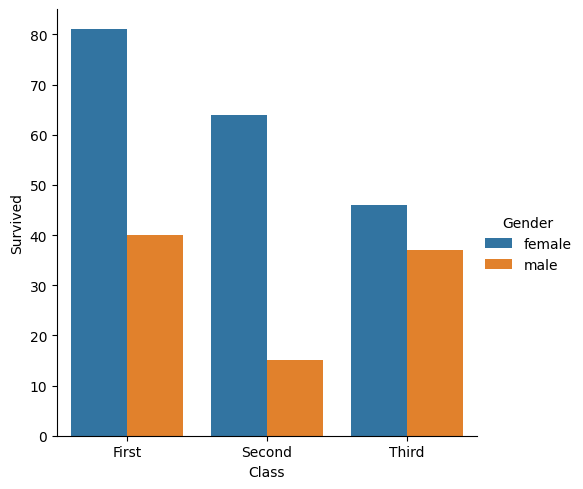

In [178]:
survival_counts = df.groupby(['Class', 'Gender'], observed=True)['Survived'].sum().reset_index()
sns.catplot(data=survival_counts, x='Class', y='Survived', kind='bar', hue='Gender')

### Insights from the Dataset

- From our Dataset we can see that women were more likely to survive than men with just under 100 more women surviving compared to men.
- We can also see that those in First Class were older on average than those in Second or Third Class. However, they did pay considerably more to ride in First Class with the average fare price coming in at 88.40, which was 66.23 more expensive than Second Class.
- Compared to the price difference from Second to Third class being only 8.79.
- We can also see that First Class had a 65.76% chance of survival, Second Class had a 50% chance of survival and Third Class had the lowest rate of survival at 24.85%